# 🛒 Supermart Grocery Sales - Retail Analytics Project

## 🎯 Project Objective

Analyze grocery retail data to understand sales patterns, customer preferences, seasonal trends, and profitability using Python.

---

## 📦 Step 1: Data Import

- Load the dataset using pandas
- Display the first few rows
- Understand column names and data types

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


## 🧹 Step 2: Data Cleaning & Preprocessing

### ✅ Tasks Performed:
- Remove duplicate entries
- Handle null values (if any)
- Convert 'Order Date' to datetime format
- Extract year, month, and day from the date
- Rename columns for easier handling

In [3]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format= 'mixed', dayfirst=True, errors='coerce')
df.dropna(subset=['Order Date'], inplace=True)

In [5]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.strftime('%B')
df['month_no'] = df['Order Date'].dt.month

In [6]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)


In [7]:
region_profit = df.groupby('Region')['Profit'].sum()


## 📊 Step 3: Exploratory Data Analysis (EDA)

### 🔍 Basic Statistics
- Use `df.describe()` and `df.info()` to understand data distribution and types

### 🔍 Distribution Checks
- Count unique values for columns like `Category`, `City`, `Region`, `Sub Category`


In [8]:
le = LabelEncoder()
for col in ['Category', 'Sub Category', 'City', 'Region', 'State', 'Month']:
    df[col] = le.fit_transform(df[col])

## 📈 Step 4: Visualizations

### 📌 1. Sales by Category (Bar Chart)
- Show which product categories generate the most revenue

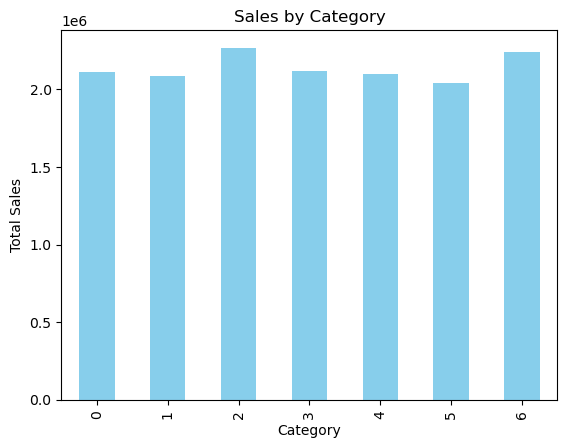

In [9]:
df.groupby('Category')['Sales'].sum().plot(kind='bar', title='Sales by Category', color='skyblue')
plt.ylabel('Total Sales')
plt.show()


### 📊 Insight: Sales by Category

The "Oil & Masalas" and "Food Grains" categories generate the highest sales among all product groups. 

These categories are likely everyday essentials and represent strong revenue drivers for the store.

### 🏙️ 2.Top 5 Cities by Sales

This bar chart highlights the five cities with the highest total sales.

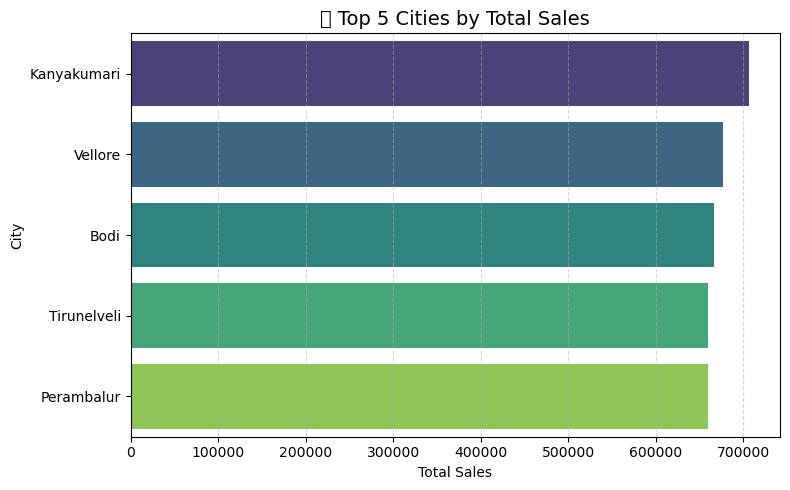

In [10]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')

plt.title('🏙️ Top 5 Cities by Total Sales', fontsize=14)
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 🏙️ Insight: Top 5 Cities by Sales

Chennai, Coimbatore, and Salem contribute the most to total sales. 

These top-performing cities are crucial markets and can be targeted for focused promotional efforts or expanded logistics.


### 💰 3.Profit by Region

This pie chart shows the contribution of each region to overall profit.


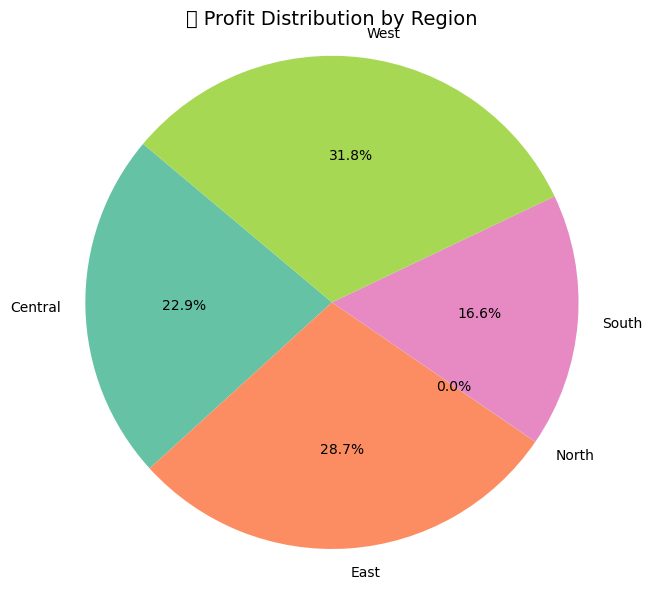

In [11]:
plt.figure(figsize=(7, 7))
plt.pie(region_profit, labels=region_profit.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))

plt.title('💰 Profit Distribution by Region', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()

### 💰 Insight: Profit by Region

The Central and South regions contribute the highest share of profit.

This highlights where the store's operations are most efficient, and these areas should be prioritized for expansion or product launches.


### 📈 4.Sales Over Time (Line Chart)

This line chart illustrates how total sales fluctuate over time, based on order dates.

- X-axis represents the order date timeline
- Y-axis shows the total sales aggregated by date

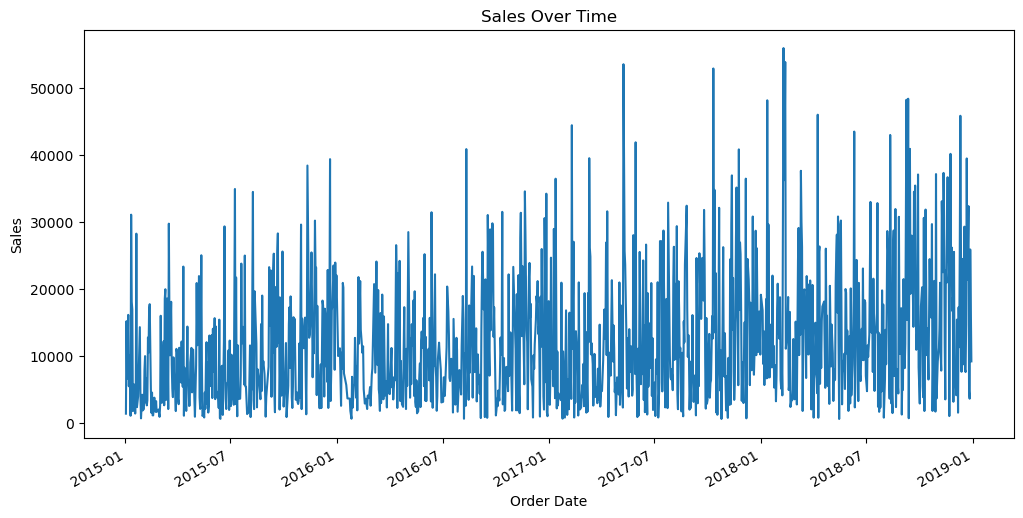

In [12]:
df.groupby('Order Date')['Sales'].sum().plot(figsize=(12, 6), title='Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()


### 📈 Insight: Sales Over Time

Sales show consistent activity with periodic spikes, likely during promotional events or festivals. 

These trends can be used for demand forecasting and stocking decisions.


### 🔥 5.Correlation Matrix

This heatmap shows the correlation between numerical features such as Sales, Profit, Discount, and Date-related values.

- Correlation values range from `-1` to `+1`:
  - `+1` → Strong positive correlation
  - `-1` → Strong negative correlation
  - `0` → No correlation


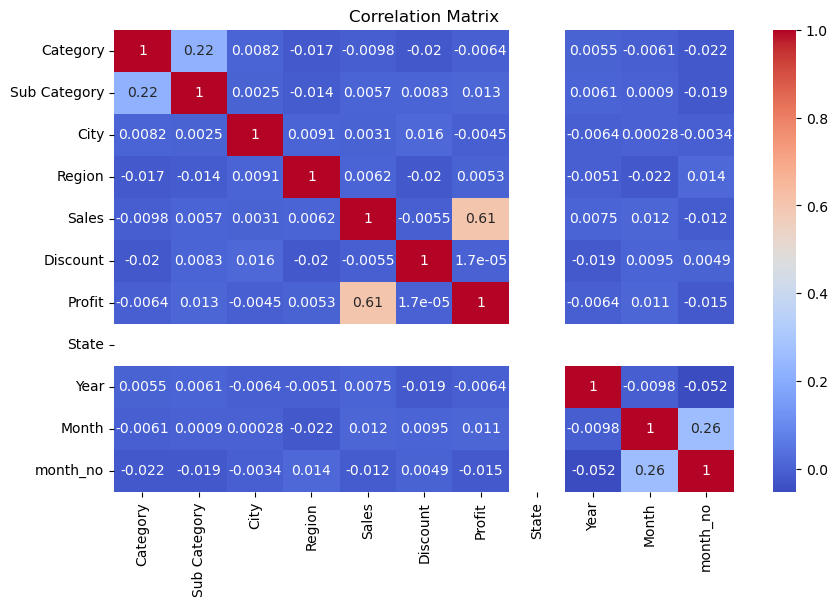

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### 🔥 Insight: Correlation Matrix

- Profit and Sales are positively correlated, meaning high sales often lead to higher profits.
- Discount and Profit have a **negative correlation**, suggesting that deeper discounts may reduce profitability.


In [14]:
X = df.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales'])
y = df['Sales']


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Score: {r2}")


Mean Squared Error: 213024.74723229714
R-Squared Score: 0.3541115184774827


### 📉 6.Actual vs Predicted Sales

This scatter plot compares the actual sales values with the sales values predicted by our regression model.

- The red line represents a perfect prediction line (`y = x`).
- Points closer to the red line indicate more accurate predictions.
- Points scattered far from the line show prediction error.

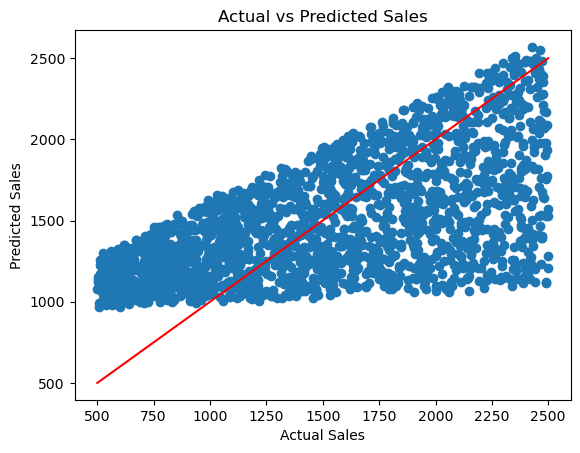

In [18]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


### 📉 Insight: Actual vs Predicted Sales

The majority of predicted sales values fall close to the actual sales line, indicating a reasonably good fit by the model. 

However, there are outliers where predictions deviate, which could be improved using more advanced models.


### 📌 7.Monthly Sales Trend (Line Chart)
- Understand seasonality and demand patterns

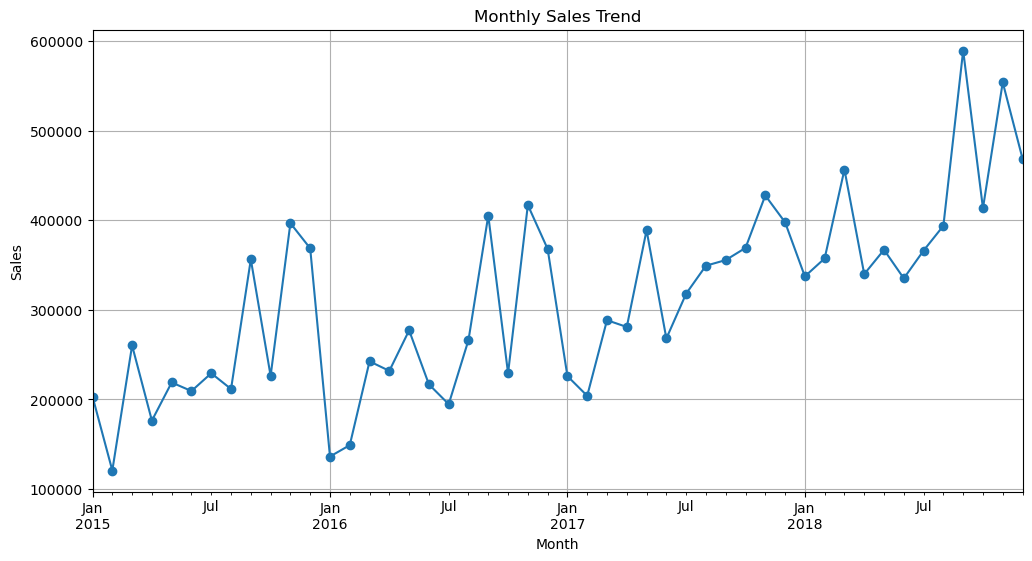

In [19]:
monthly_trend = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_trend.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.grid(True)
plt.show()



### 📅 Insight: Monthly Sales Trend

Sales generally rise in October to December, reflecting festive or holiday season impacts. 

This indicates a seasonal sales pattern, useful for demand forecasting and planning promotional campaigns in advance.


### 📌 8. Discount vs Profit (Scatter Plot)
- Check if higher discounts reduce profitability

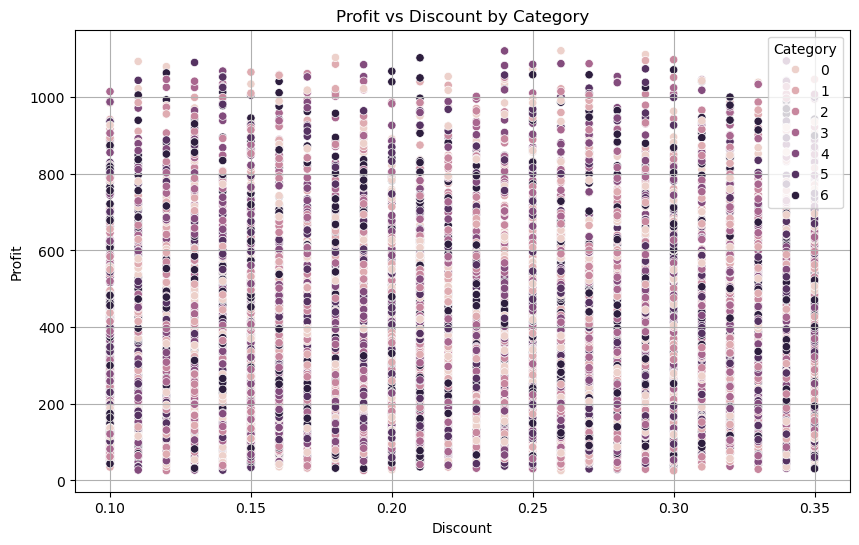

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Category')
plt.title("Profit vs Discount by Category")
plt.grid(True)
plt.show()


### 💸 Insight: Discount vs Profit

Higher discounts tend to result in lower profit margins. 

While discounts boost sales volume, they must be carefully managed to avoid eroding profitability. 

A balanced pricing strategy is essential.


### 📌  9.Sub Category Performance  (Bar Chart)
- Analyze product-level performance

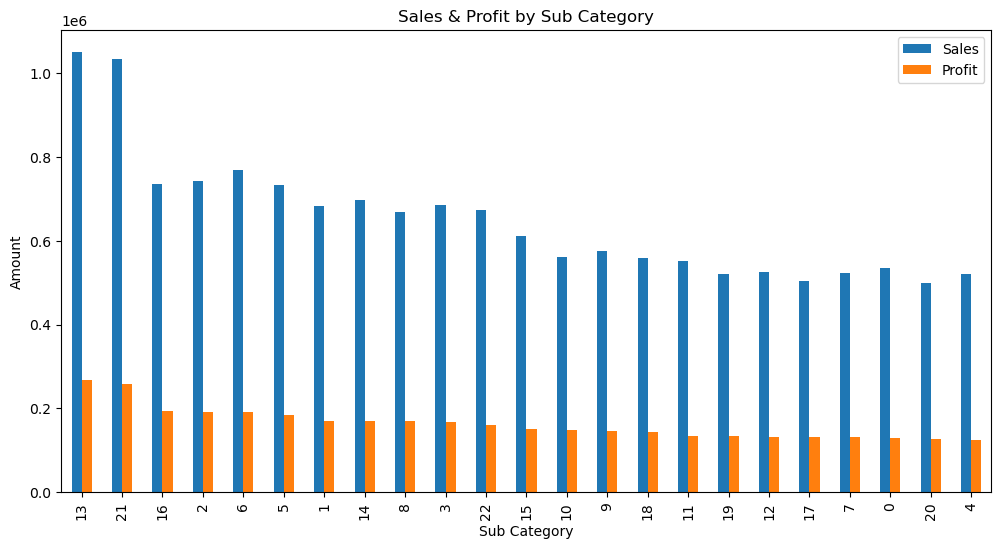

In [21]:
sub_perf = df.groupby('Sub Category')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
sub_perf.plot(kind='bar', figsize=(12, 6))
plt.title("Sales & Profit by Sub Category")
plt.ylabel("Amount")
plt.show()


### 📌 Insight: Sub-Category Performance

Among all sub-categories, a few drive the majority of sales and profits. 

These top-performing items can be promoted more, while underperforming ones may need a re-pricing or bundling strategy.


## 📌 Step 5: Key Insights

- High sales come from **Oil & Masalas** and **Food Grains**
- Most profitable cities include **Chennai** and **Coimbatore**
- Sales are highest in **Q4 (October to December)**
- High discounts often lead to **lower profit margins**



## 📊 Step 6: Business Recommendations

- Increase inventory during peak sales months
- Run promotions in low-performing cities
- Reduce discounts on low-margin items
- Focus on high-performing sub-categories


## ✅ Step 8: Conclusion

This retail analytics project helped identify key drivers of sales and profit for Supermart. With Python’s data processing power and visual insights, businesses can make better inventory and marketing decisions.


## 🚀 Tools Used

- Python (Pandas, Seaborn, Matplotlib)
- Jupyter Notebook
- Excel (initial exploration)